<a href="https://colab.research.google.com/github/marcosjsh/fiap_tech_challenge/blob/main/tech_challenge_1_with_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **O PROBLEMA**

Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

Origem dos dados: Arquivo 'insurance.csv' obtido através do github do curso(https://github.com/FIAP/CURSO_IA_ML)

***1 - Leitura dos dados***

In [1]:
import pandas as pd

df = pd.read_csv('insurance.csv')

In [2]:
df.shape

(1338, 7)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

***2 - Representação gráfica dos dados***

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

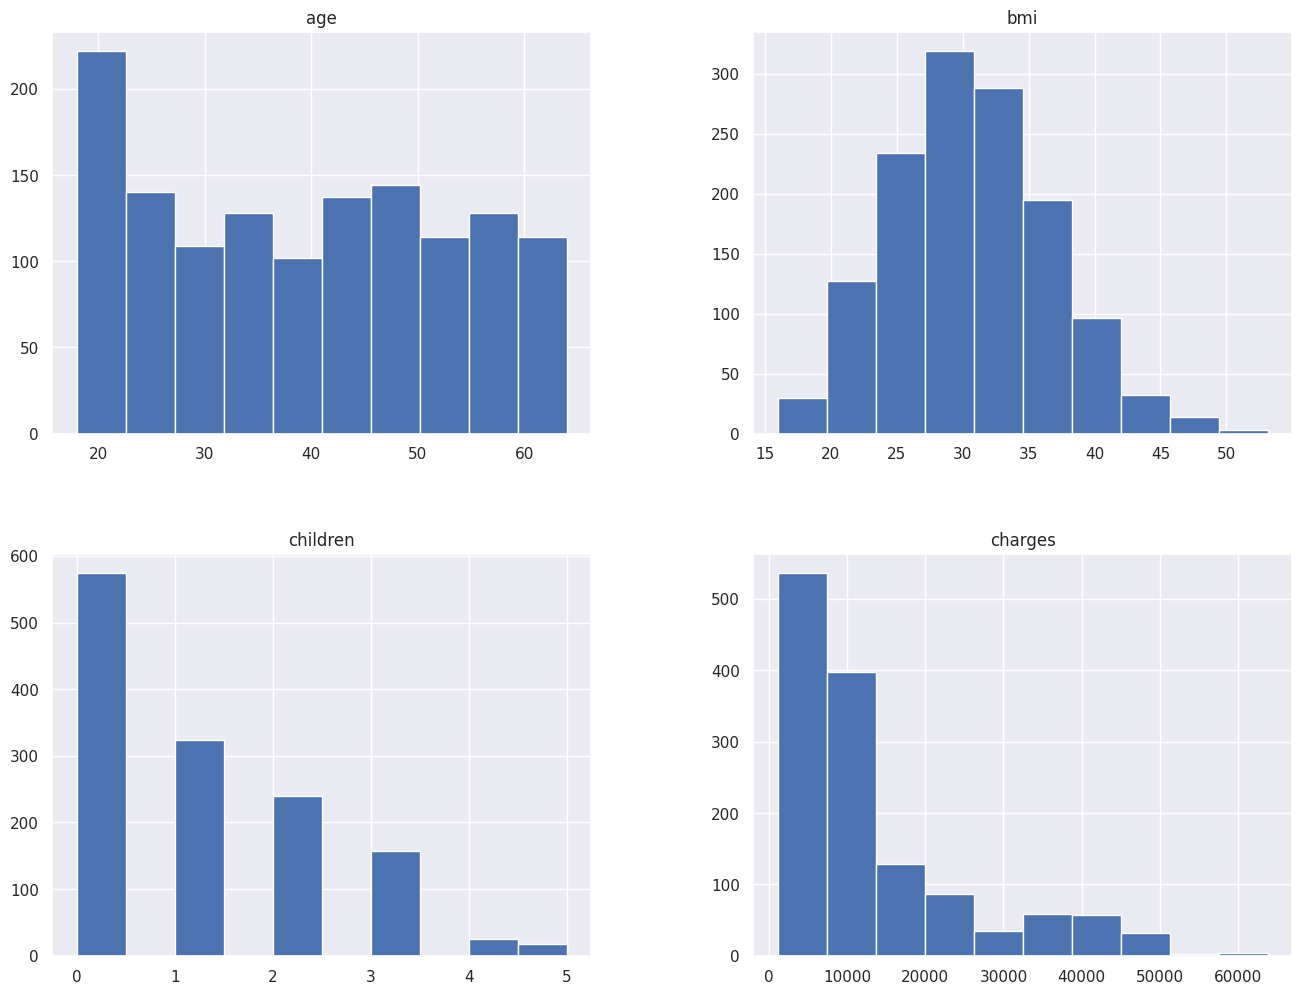

In [8]:
df.hist(bins=10, figsize=(16, 12))

Text(0, 0.5, 'Quantity')

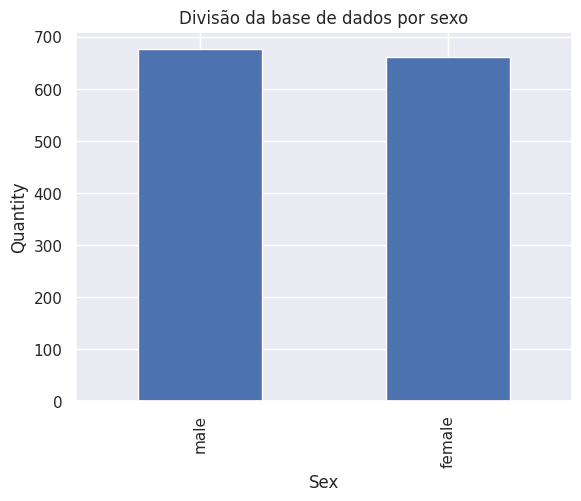

In [9]:
sex_count = df['sex'].value_counts()
sex_count.plot(kind='bar')
plt.title('Divisão da base de dados por sexo')
plt.xlabel('Sex')
plt.ylabel('Quantity')

In [10]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

Obs: A base está relativamente bem equilibrada entre ambos os sexos.

Text(0, 0.5, 'Quantity')

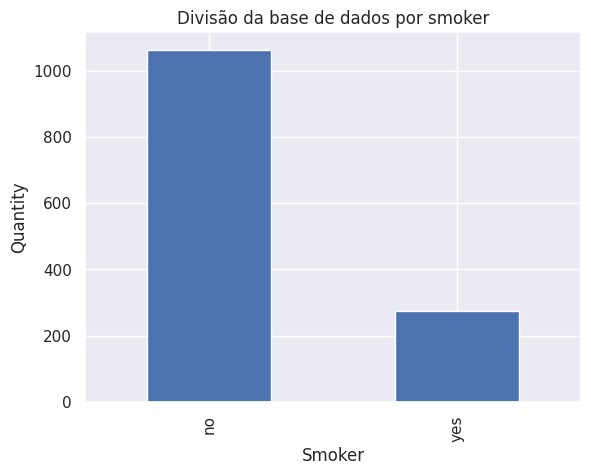

In [11]:
smoker_count = df['smoker'].value_counts()
smoker_count.plot(kind='bar')
plt.title('Divisão da base de dados por smoker')
plt.xlabel('Smoker')
plt.ylabel('Quantity')

In [12]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Obs: A base de dados possui muito mais segurados não-fumantes do que fumantes.

Text(0, 0.5, 'Quantity')

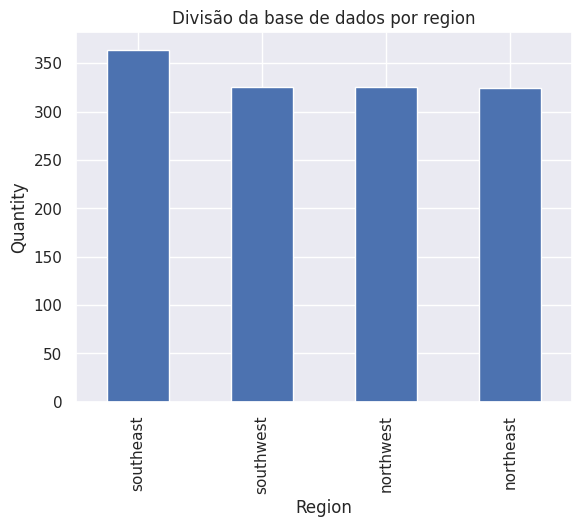

In [13]:
region_count = df['region'].value_counts()
region_count.plot(kind='bar')
plt.title('Divisão da base de dados por region')
plt.xlabel('Region')
plt.ylabel('Quantity')

In [14]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Obs: A base de dados tem um desequilíbrio no número de segurados com cerca de 12% mais segurados na região 'southeast'.

Vamos ver como está a questão dos outliers.

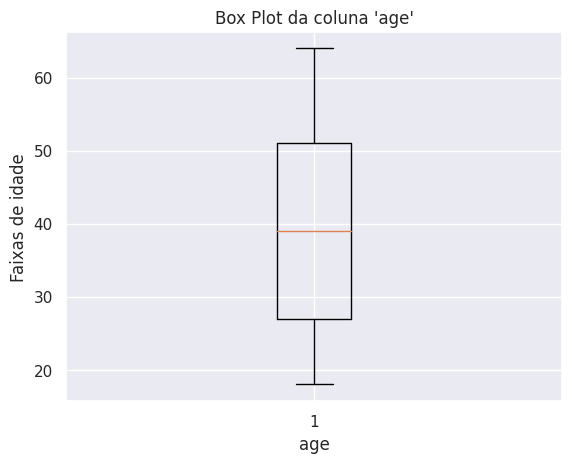

In [15]:
plt.boxplot(df['age'])
plt.xlabel('age')
plt.ylabel('Faixas de idade')
plt.title(f'Box Plot da coluna \'age\'')
plt.show()

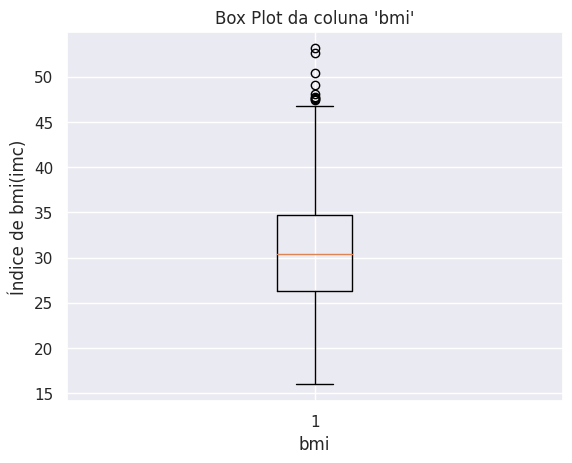

In [16]:
plt.boxplot(df['bmi'])
plt.xlabel('bmi')
plt.ylabel('Índice de bmi(imc)')
plt.title(f'Box Plot da coluna \'bmi\'')
plt.show()

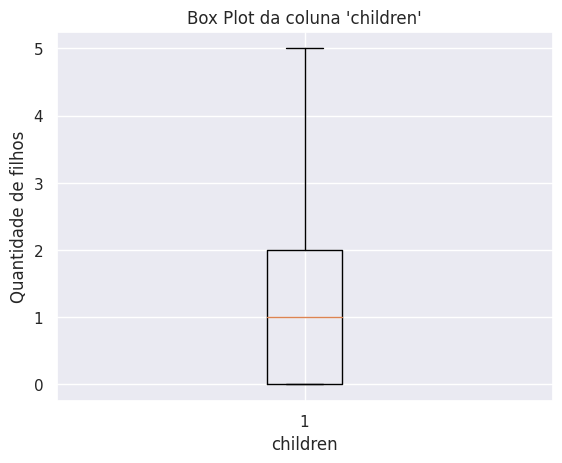

In [17]:
plt.boxplot(df['children'])
plt.xlabel('children')
plt.ylabel('Quantidade de filhos')
plt.title(f'Box Plot da coluna \'children\'')
plt.show()

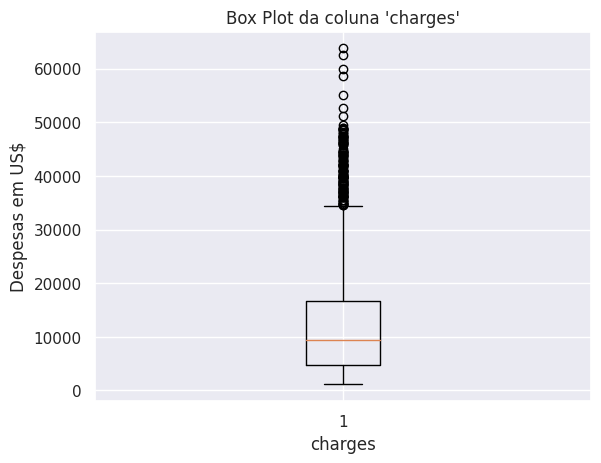

In [18]:
plt.boxplot(df['charges'])
plt.xlabel('charges')
plt.ylabel('Despesas em US$')
plt.title(f'Box Plot da coluna \'charges\'')
plt.show()

Obs: Encontramos alguns outliers em 'bmi' e 'charges'. Estaria a obesidade fortemente ligada ao aumento de custos de um segurado?


Vamos verificar como está a distribuição de custos por 'region'.

<ipython-input-19-633049788cb9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot_horizontal = sns.barplot(x=df['charges'], y=df['region'], data=df, estimator=sum, palette="Blues", ci=None)
<ipython-input-19-633049788cb9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_horizontal = sns.barplot(x=df['charges'], y=df['region'], data=df, estimator=sum, palette="Blues", ci=None)


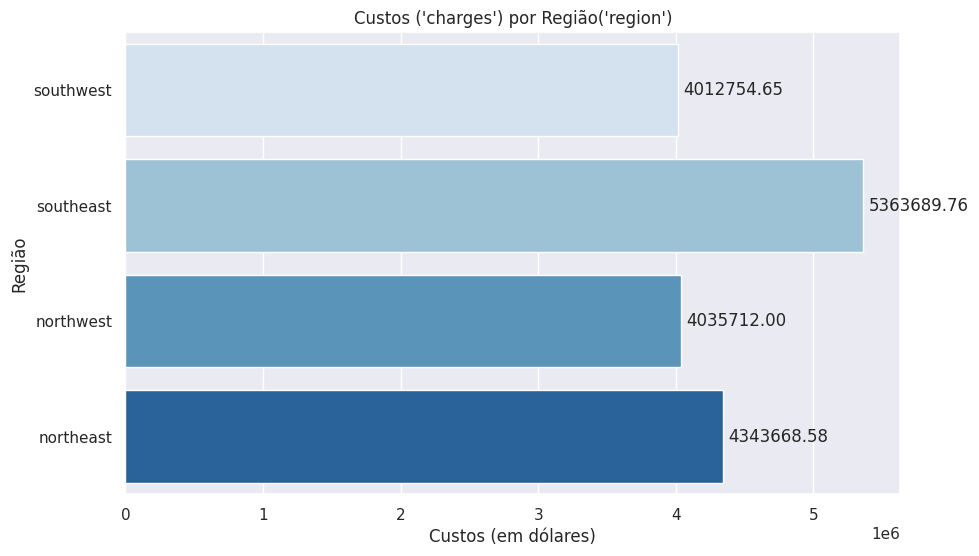

In [19]:
plt.figure(figsize=(10, 6))
bar_plot_horizontal = sns.barplot(x=df['charges'], y=df['region'], data=df, estimator=sum, palette="Blues", ci=None)

plt.title('Custos (\'charges\') por Região(\'region\')')
plt.xlabel('Custos (em dólares)')
plt.ylabel('Região')

for p in bar_plot_horizontal.patches:
    bar_plot_horizontal.annotate(format(p.get_width(), '.2f'),
                                 (p.get_width(), p.get_y() + p.get_height() / 2.),
                                 ha = 'center', va = 'center',
                                 xytext = (40, 0),
                                 textcoords = 'offset points')

plt.show()

Obs: Os custos totais de 'southeast' são maiores que nas outras regiões devido também ao fato de esta região também ter o maior número de segurados. Nas demais regiões, as despesas totais ficam na mesma faixa praticamente.

<ipython-input-20-2baaaa3b07da>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='Blues', ci=None)


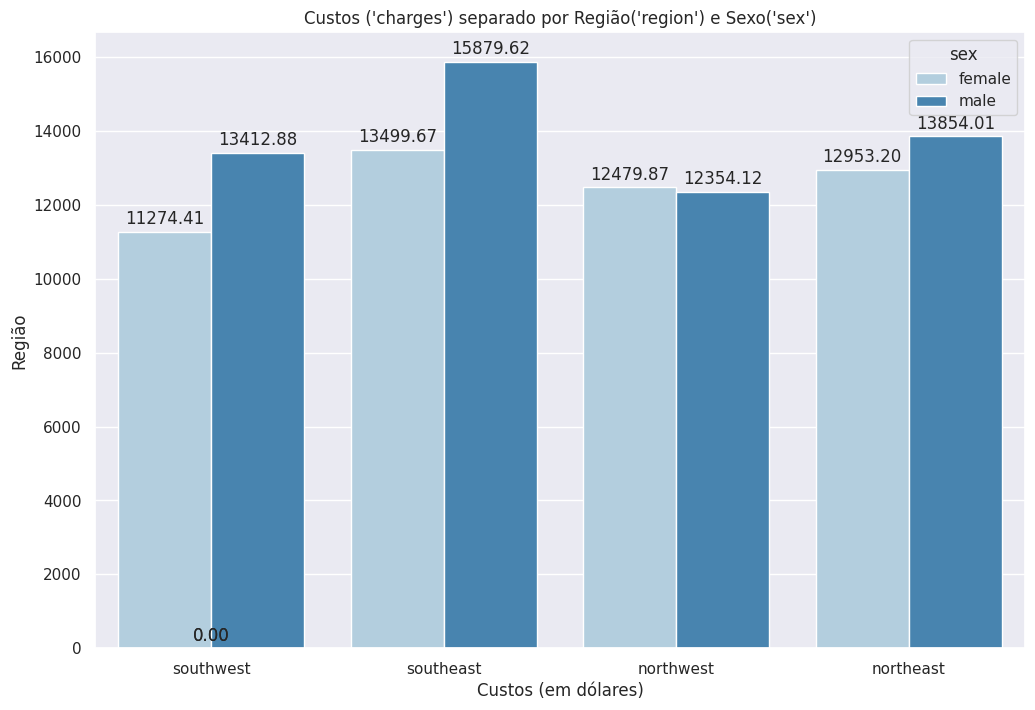

In [20]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='Blues', ci=None)
ax.set_title('Custos (\'charges\') separado por Região(\'region\') e Sexo(\'sex\')')
ax.set_xlabel('Custos (em dólares)')
ax.set_ylabel('Região')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

Obs: Aqui verificamos que os custos no geral, são ligeiramente mais altos para os homens

<ipython-input-21-b2c27b0d20cf>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='Blues', ci=None)


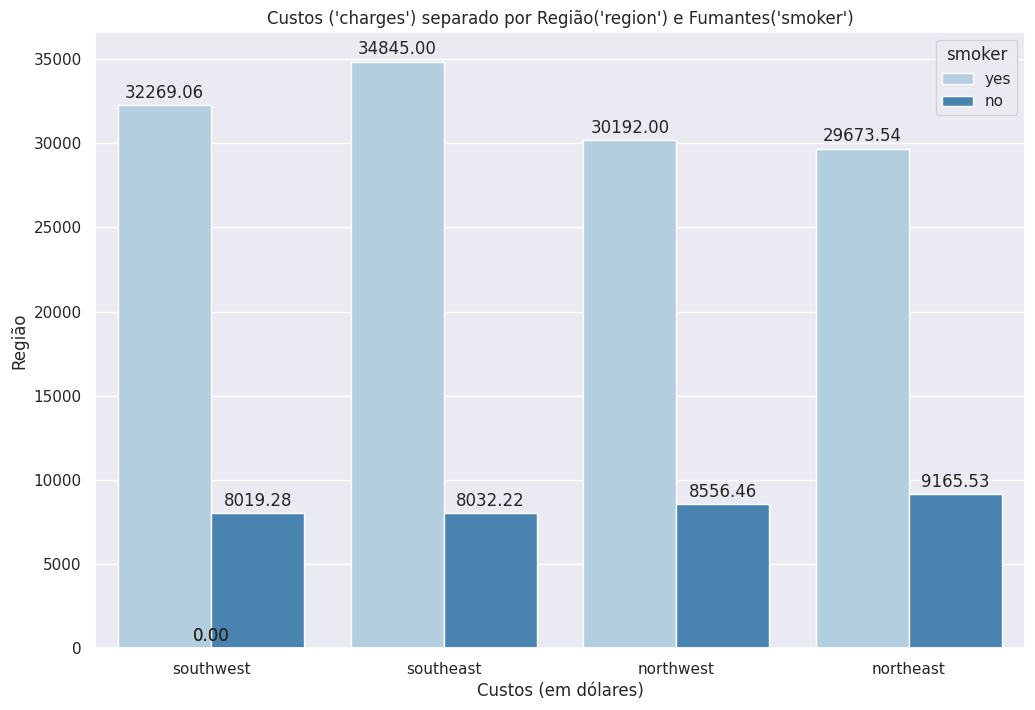

In [21]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='Blues', ci=None)
ax.set_title('Custos (\'charges\') separado por Região(\'region\') e Fumantes(\'smoker\')')
ax.set_xlabel('Custos (em dólares)')
ax.set_ylabel('Região')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

Obs: Fumantes tem custos muito mais elevados do que não fumantes.

<ipython-input-22-e634175abe00>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='region', y='charges', hue=df['children'], data=df, palette='Blues', ci=None)


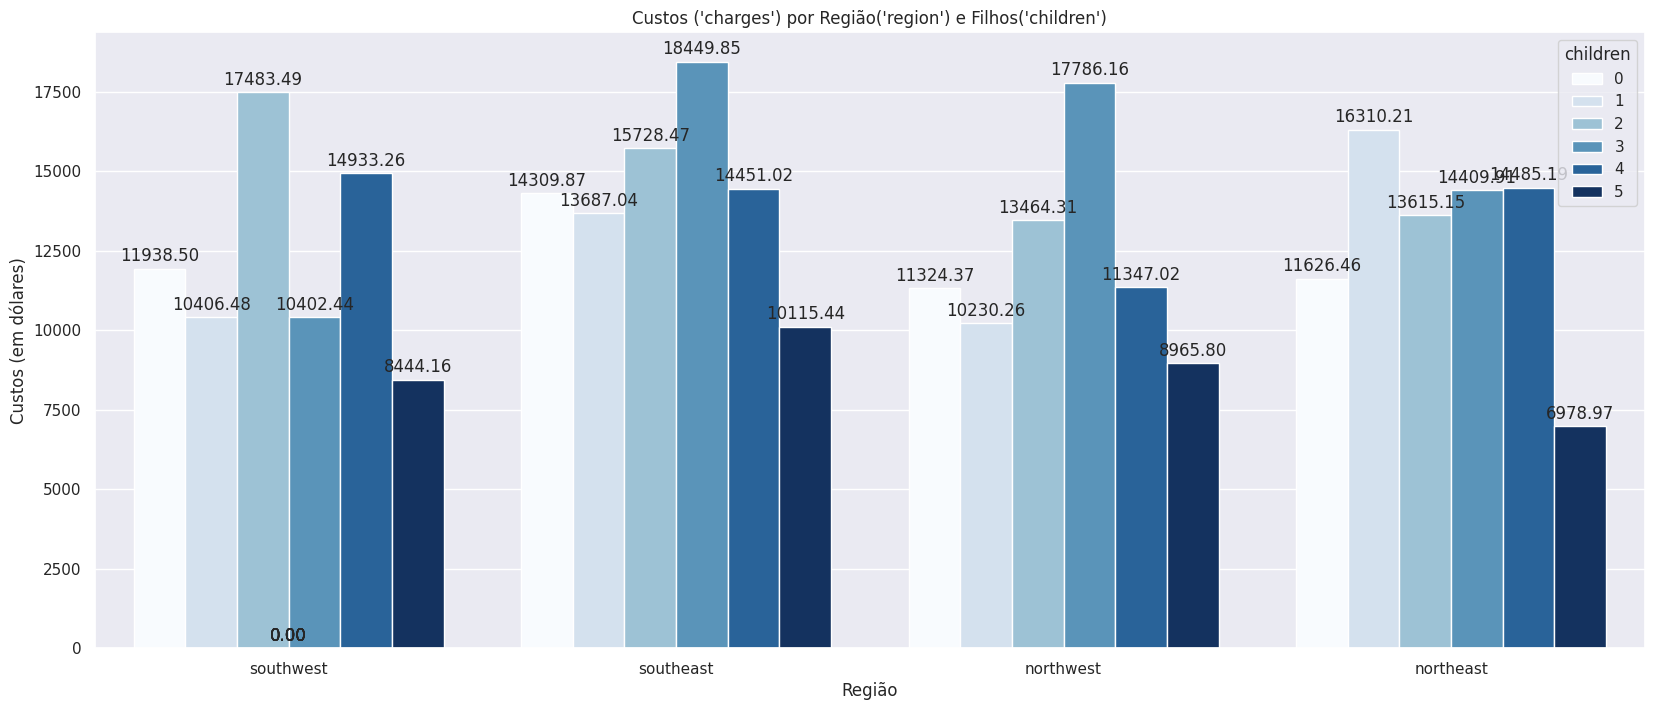

In [22]:
f, ax = plt.subplots(1, 1, figsize=(20, 8))
ax = sns.barplot(x='region', y='charges', hue=df['children'], data=df, palette='Blues', ci=None)

ax.set_title('Custos (\'charges\') por Região(\'region\') e Filhos(\'children\')')
ax.set_xlabel('Região')
ax.set_ylabel('Custos (em dólares)')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

Obs: Este gráfico demonstra que a quantidade de filhos no geral não influenciam os custos, exceto no caso dos segurados com 5 filhos. Porém, o gráfico a seguir nos diz outra coisa.

<ipython-input-26-ba20f1dec77e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='children', y='charges', data=df, palette='Blues', ci=None)
<ipython-input-26-ba20f1dec77e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='children', y='charges', data=df, palette='Blues', ci=None)


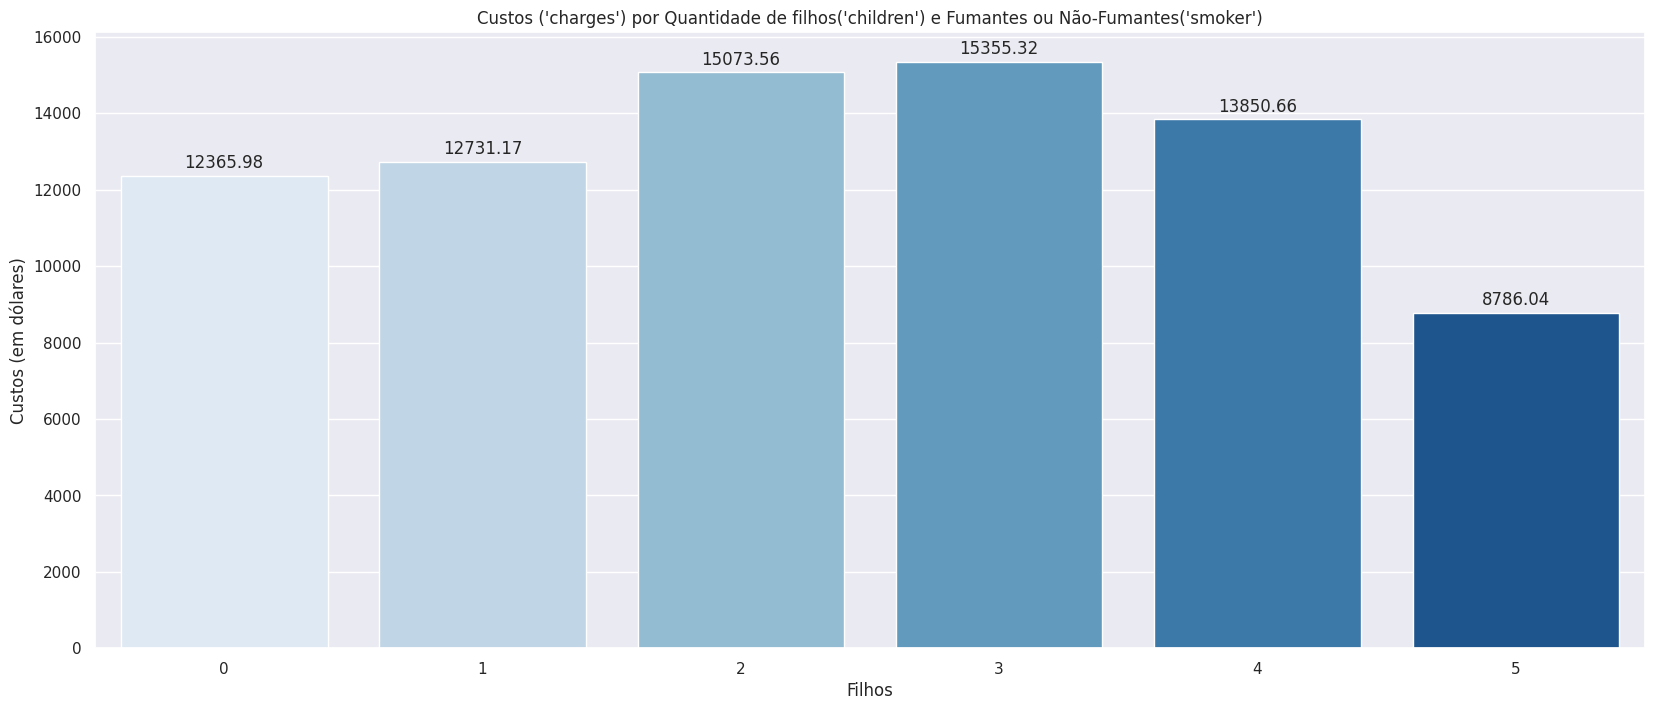

In [26]:
f, ax = plt.subplots(1, 1, figsize=(20, 8))
ax = sns.barplot(x='children', y='charges', data=df, palette='Blues', ci=None)

ax.set_title('Custos (\'charges\') por Quantidade de filhos(\'children\') e Fumantes ou Não-Fumantes(\'smoker\')')
ax.set_xlabel('Filhos')
ax.set_ylabel('Custos (em dólares)')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

Obs: Notem que os custos tendem a aumentar de 0 a 3 filhos e caem à partir de 4 filhos ou mais.

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

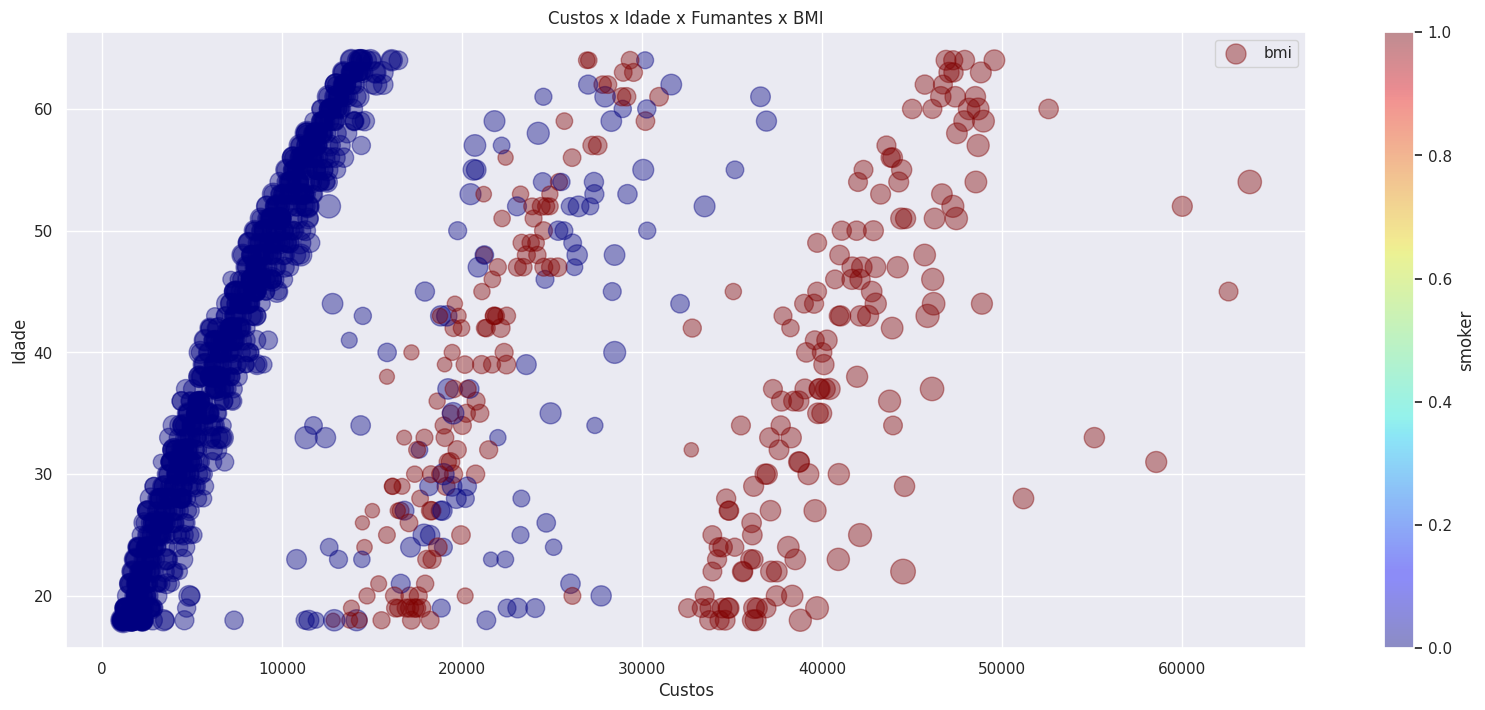

In [25]:
df.plot(
    kind='scatter',
    x='charges',
    y='age',
    alpha=0.4,
    s=df['bmi']*6,
    label='bmi',
    figsize=(20,8),
    c="smoker",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    sharex=False)

plt.xlabel('Custos')
plt.ylabel('Idade')
plt.title('Custos x Idade x Fumantes x BMI')
plt.show()

Obs: Este gráfico de scatter nos mostra claramente que os não-fumantes possuem despesas menores, até entre os obesos. Segurados mais jovens também tendem a ter as despesas ligeiramente menores.

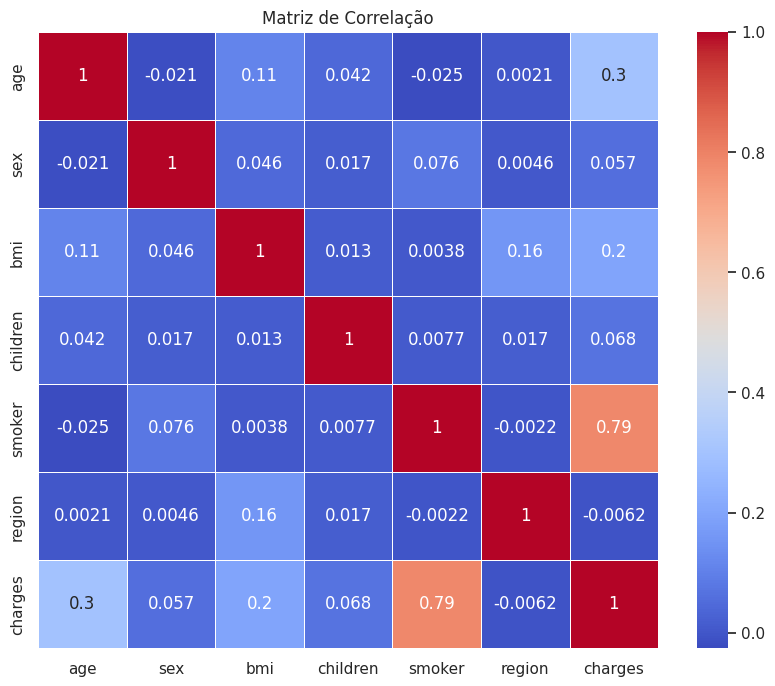

In [27]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

Obs: Aqui verificamos que a variável 'charges' tem uma forte correlação positiva com 'smoker', indicando que fumantes geram mais custos para o plano de saúde. As variáveis 'age' e 'bmi' possuem correlação moderada, também refletindo em custos mais altos. As demais variáveis possuem baixíssima correlação ou até correlação negativa e possívelmente não exercem impacto nos custos dos segurados.

***3 - Criação do modelo preditivo***

***3.1 - Experimentando o Linear Regression***